Assessing model accuracy (10-Fold Cross-Validation)

- Logistic Regression
- k-Nearest Neighbors
- LDA (Linear Discriminant Analysis)
- QDA (Quadratic Discriminant Analysis)
- Naive Bayes
- Tree-based Approaches
- Support Vector Machines (SVM)

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import numpy as np
import seaborn as sns


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

In [3]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 1)
trainingPercent = 0.8

# 1. Data Preparation

## 1.1 Load the data

In [4]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 1.2 Split it into training and test sets

In [5]:
from sklearn.model_selection import train_test_split

y_train, y_test, X_train, X_test  = train_test_split(data["WeakLinks"], data.drop(columns=["WeakLinks"]), train_size = trainingPercent, random_state=5)

# 2. Create the Models

## 2.1 Logistic Regression

Maximum accuracy:- 0.5851318944844125 at C = 3


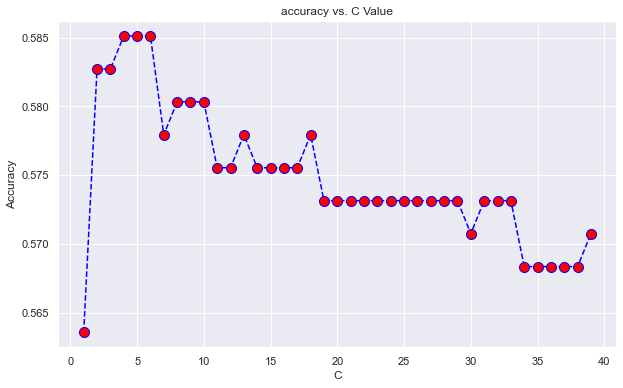

In [6]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    lr = LogisticRegression(solver='liblinear', C=i, random_state=0)
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at C =",acc.index(max(acc)))

In [7]:
lr = LogisticRegression(solver='liblinear', C=3, random_state=0)
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(preds_lr, y_test)
print(accuracy_lr)

0.5827338129496403


In [8]:
lr_cv_scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv = kfolds)

print(lr_cv_scores.min())
print(lr_cv_scores.mean())
print(lr_cv_scores.max())

0.49101796407185627
0.5354195224009812
0.5783132530120482


## 2.2 k-Nearest Neighbors (kNN)

Minimum error:- 0.41247002398081534 at K = 10


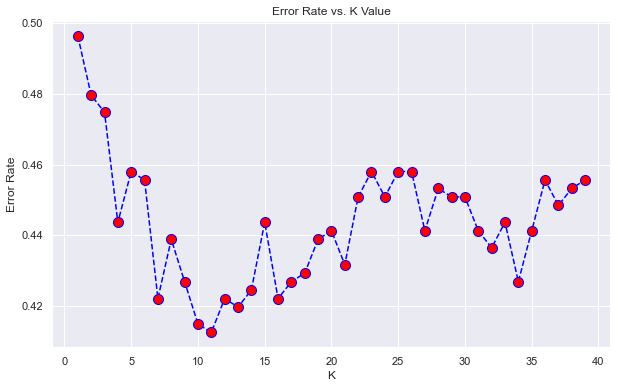

In [9]:
error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.5875299760191847 at K = 10


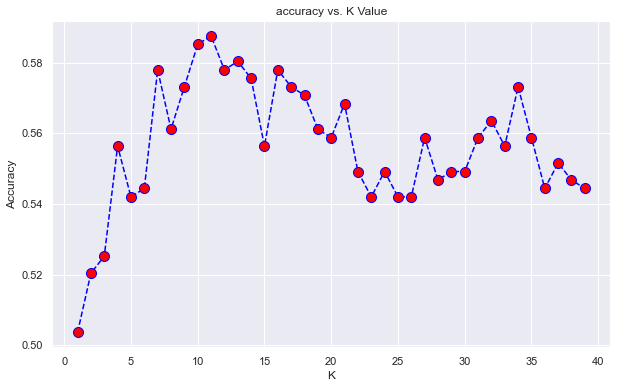

In [10]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(preds_knn, y_test)
print(accuracy_knn)

0.5851318944844125


In [12]:
knn_cv_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv = kfolds)

print(knn_cv_scores.min())
print(knn_cv_scores.mean())
print(knn_cv_scores.max())

0.4251497005988024
0.5180001442897338
0.592814371257485


## 2.3 LDA (Linear Discriminant Analysis)

In [13]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
preds_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(preds_lda, y_test)
print(accuracy_lda)

0.5611510791366906


In [14]:
lda_cv_scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv = kfolds)

print(lda_cv_scores.min())
print(lda_cv_scores.mean())
print(lda_cv_scores.max())

0.47904191616766467
0.531238727364548
0.5963855421686747


## 2.4 QDA (Quadratic Discriminant Analysis)

In [15]:
qda = LinearDiscriminantAnalysis()
qda.fit(X_train, y_train)
preds_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(preds_qda, y_test)
print(accuracy_qda)

0.5611510791366906


In [16]:
qda_cv_scores = cross_val_score(qda, X_train, y_train, scoring='accuracy', cv = kfolds)

print(qda_cv_scores.min())
print(qda_cv_scores.mean())
print(qda_cv_scores.max())

0.47904191616766467
0.531238727364548
0.5963855421686747


## 2.5 Naive Bayes

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(preds_nb, y_test)
print(accuracy_nb)

0.4676258992805755


In [18]:
nb_cv_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv = kfolds)

print(nb_cv_scores.min())
print(nb_cv_scores.mean())
print(nb_cv_scores.max())

0.38323353293413176
0.4832371401774764
0.5508982035928144


## 2.6 Tree-based Approaches

### Decision Tree Classifier

In [19]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

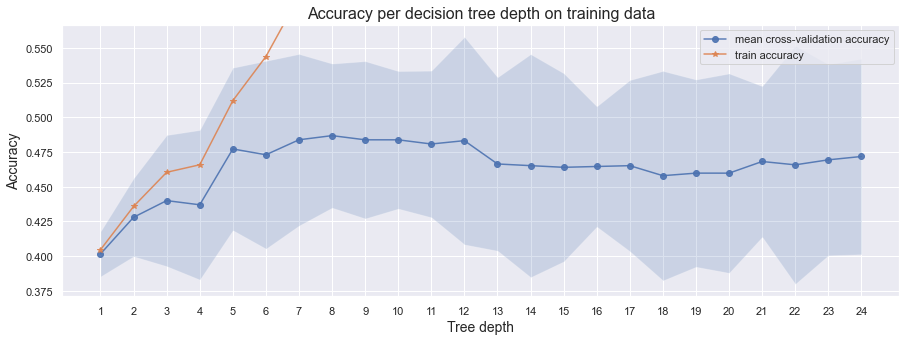

In [20]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [21]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-8 tree achieves the best mean cross-validation accuracy 48.68119 +/- 2.59368% on training dataset


In [22]:
dtc = DecisionTreeClassifier(max_depth=sm_best_tree_depth)
dtc.fit(X_train, y_train)
preds_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(preds_dtc, y_test)
print(accuracy_dtc)

0.4988009592326139


In [23]:
dtc_cv_scores = cross_val_score(dtc, X_train, y_train, scoring='accuracy', cv = kfolds)

print(dtc_cv_scores.min())
print(dtc_cv_scores.mean())
print(dtc_cv_scores.max())

0.40718562874251496
0.4814082678017459
0.5329341317365269


### Random Forest Classifier

In [24]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_forest_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(bootstrap='False', max_depth=depth, n_estimators=200)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_forest_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

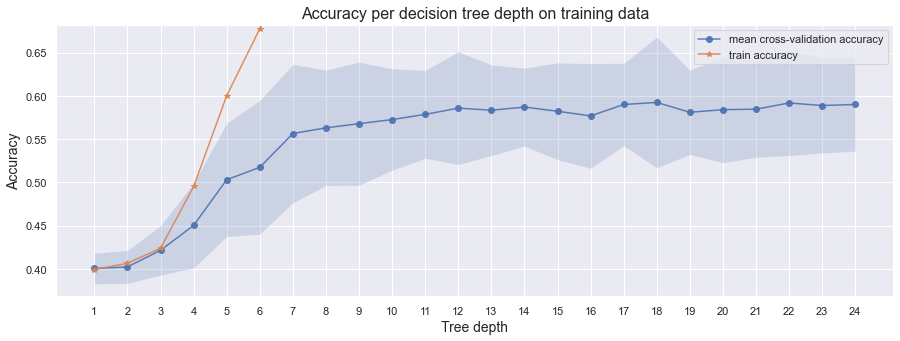

In [25]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_forest_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [26]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-18 tree achieves the best mean cross-validation accuracy 59.23238 +/- 3.78843% on training dataset


In [27]:
rfc = RandomForestClassifier(bootstrap='False', max_depth=sm_best_tree_depth, n_estimators=200)
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(preds_rfc, y_test)
print(accuracy_rfc)

0.6139088729016786


In [28]:
rfc_cv_scores = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv = kfolds)

print(rfc_cv_scores.min())
print(rfc_cv_scores.mean())
print(rfc_cv_scores.max())

0.5029940119760479
0.582151359930741
0.6646706586826348


## 2.7 Support Vector Machines (SVM)

### Linear kernel

In [29]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 25, 50]
}

# 10-fold cross validation (cv=10) 
cv_svm_linear_first = GridSearchCV(SVC(kernel='linear'), params, cv=10)
cv_svm_linear_first.fit(X_train, y_train)

print(cv_svm_linear_first.best_params_)
c = cv_svm_linear_first.best_params_['C']

{'C': 1}


In [30]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1]
}

# 10-fold cross validation (cv=10) 
cv_svm_linear_second = GridSearchCV(SVC(kernel='linear'), params, cv=10)
cv_svm_linear_second.fit(X_train, y_train)

print(cv_svm_linear_second.best_params_)
c = cv_svm_linear_second.best_params_['C']

{'C': 2}


In [31]:
svm_linear = SVC(C=c, kernel='linear')
svm_linear.fit(X_train, y_train)
preds_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(preds_svm_linear, y_test)
print(accuracy_svm_linear)

0.5779376498800959


In [32]:
svm_linear_cv_scores = cross_val_score(svm_linear, X_train, y_train, scoring='accuracy', cv = kfolds)

print(svm_linear_cv_scores.min())
print(svm_linear_cv_scores.mean())
print(svm_linear_cv_scores.max())

0.48502994011976047
0.556402856936729
0.6024096385542169


### Radial Kernel

In [33]:
params = {
    'C': [0.1, 1, 3, 5, 10, 20, 30],
    'gamma': [00.1, 0.1, 1, 5]
}

cv_svm_radial_first = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
cv_svm_radial_first.fit(X_train, y_train)
c = cv_svm_radial_first.best_params_['C']
gamma = cv_svm_radial_first.best_params_['gamma']
print(cv_svm_radial_first.best_params_)

{'C': 3, 'gamma': 1}


In [34]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1],
    'gamma': [gamma - 1, gamma - 0.5, gamma, gamma + 0.5, gamma + 1]
}

cv_svm_radial_second = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
cv_svm_radial_second.fit(X_train, y_train)
c = cv_svm_radial_second.best_params_['C']
gamma = cv_svm_radial_second.best_params_['gamma']
print(cv_svm_radial_first.best_params_)

{'C': 3, 'gamma': 1}


In [35]:
svm_radial = SVC(C=c, kernel='rbf',gamma=gamma)
svm_radial.fit(X_train, y_train)
preds_svm_radial = svm_radial.predict(X_test)
accuracy_svm_radial = accuracy_score(preds_svm_radial, y_test)
print(accuracy_svm_radial)

0.6258992805755396


In [36]:
svm_radial_cv_scores = cross_val_score(svm_radial, X_train, y_train, scoring='accuracy', cv = kfolds)

print(svm_radial_cv_scores.min())
print(svm_radial_cv_scores.mean())
print(svm_radial_cv_scores.max())

0.47904191616766467
0.5677837096890557
0.6646706586826348


### Polynomial Kernel

In [37]:
params = {
    'C': [0.1, 1, 5, 10],
    'gamma': [0.01, 0.1, 1, 5],
    'degree':[2, 3, 4]
}

cv_svm_polynomial_first = GridSearchCV(SVC(kernel='poly'), params, cv=10)
cv_svm_polynomial_first.fit(X_train, y_train)
c = cv_svm_polynomial_first.best_params_['C']
gamma = cv_svm_polynomial_first.best_params_['gamma']
degree = cv_svm_polynomial_first.best_params_['degree']
print(cv_svm_polynomial_first.best_params_)

{'C': 5, 'degree': 4, 'gamma': 0.1}


In [38]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1],
    'gamma': [gamma - 1, gamma - 0.5, gamma, gamma + 0.5, gamma + 1],
    'degree': [degree - 1, degree - 0.5, degree, degree + 0.5, degree + 1]
}

cv_svm_polynomial_second = GridSearchCV(SVC(kernel='poly'), params, cv=10)
cv_svm_polynomial_second.fit(X_train, y_train)
c = cv_svm_polynomial_second.best_params_['C']
gamma = cv_svm_polynomial_second.best_params_['gamma']
degree = cv_svm_polynomial_second.best_params_['degree']
print(cv_svm_polynomial_second.best_params_)

{'C': 5, 'degree': 4, 'gamma': 0.1}


In [39]:
svm_polynomial = SVC(C=c, kernel='poly', degree=degree ,gamma = gamma)
svm_polynomial.fit(X_train, y_train)
preds_svm_polynomial = svm_polynomial.predict(X_test)
accuracy_svm_polynomial = accuracy_score(preds_svm_polynomial, y_test)
print(accuracy_svm_polynomial)

0.592326139088729


In [40]:
svm_polynomial_cv_scores = cross_val_score(svm_polynomial, X_train, y_train, scoring='accuracy', cv = kfolds)

print(svm_polynomial_cv_scores.min())
print(svm_polynomial_cv_scores.mean())
print(svm_polynomial_cv_scores.max())

0.5029940119760479
0.5599920640646419
0.6167664670658682


# Assessing Model Performances

## Model Accuracies

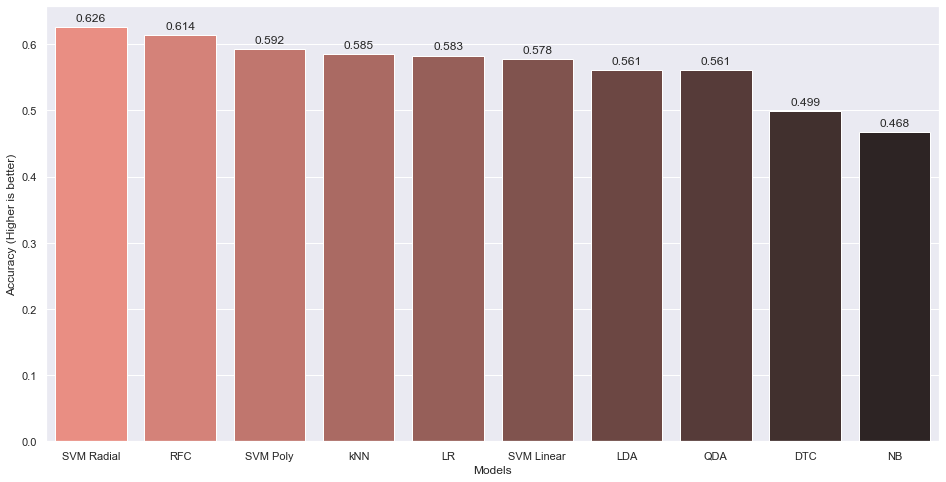

In [41]:
results = pd.DataFrame({
    "Accuracy":[
        accuracy_lr,
        accuracy_knn,
        accuracy_lda,
        accuracy_qda,
        accuracy_nb,
        accuracy_dtc,
        accuracy_rfc,
        accuracy_svm_linear,
        accuracy_svm_radial,
        accuracy_svm_polynomial
        
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (Higher is better)")

plt.show()

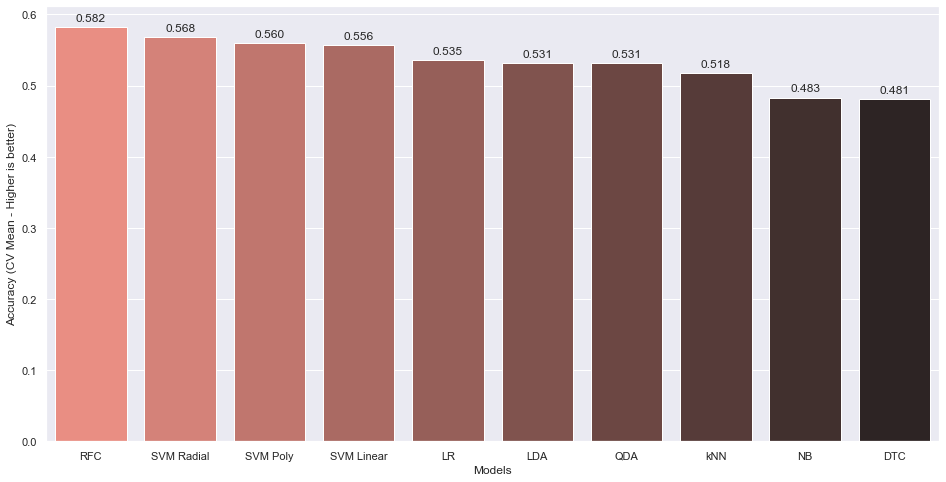

In [42]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.mean(),
        knn_cv_scores.mean(),
        lda_cv_scores.mean(),
        qda_cv_scores.mean(),
        nb_cv_scores.mean(),
        dtc_cv_scores.mean(),
        rfc_cv_scores.mean(),
        svm_linear_cv_scores.mean(),
        svm_radial_cv_scores.mean(),
        svm_polynomial_cv_scores.mean()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Mean - Higher is better)")

plt.show()

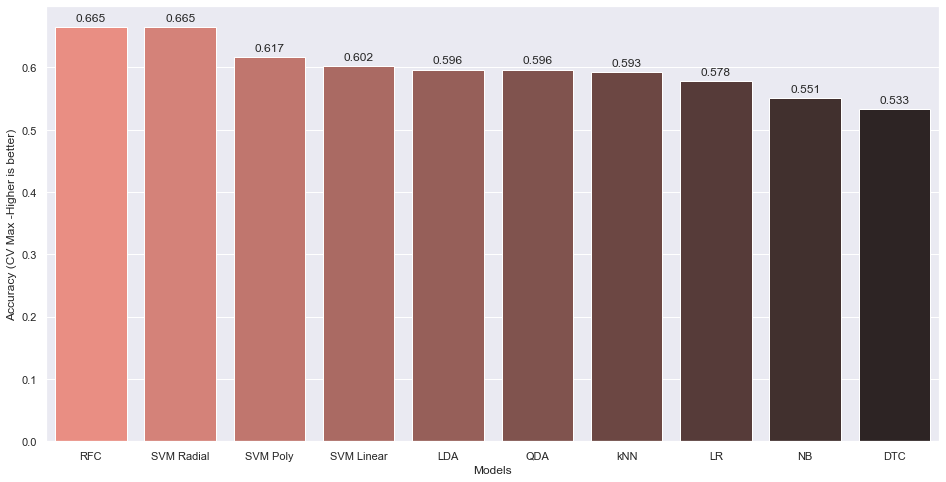

In [43]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.max(),
        knn_cv_scores.max(),
        lda_cv_scores.max(),
        qda_cv_scores.max(),
        nb_cv_scores.max(),
        dtc_cv_scores.max(),
        rfc_cv_scores.max(),
        svm_linear_cv_scores.max(),
        svm_radial_cv_scores.max(),
        svm_polynomial_cv_scores.max()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Max -Higher is better)")

plt.show()